First, import needed modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [ ]:
path = os.getcwd()
print(path)

Import datasets

In [ ]:
ltw = pd.read_csv(f'{path}/data/ltw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

View summary statistics

In [ ]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
ltw.describe().to_csv(f'{path}/tables/ltw/ltw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
ltw[columns].describe()

In [ ]:
ltw[['year', 'Land']].value_counts().to_csv(f'{path}/tables/ltw/ltw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Fig E5-E8: LTW vote shares by ever-treated status

In [ ]:
avg_ever_treated = ltw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'ever_treated', 'year', 'Land']].groupby(['ever_treated', 'year', 'Land'], as_index = False).mean()
avg_ever_treated.rename(columns = {'ever_treated':'treatment'}, inplace = True)
mean = ltw[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year', 'Land']].groupby(['year', 'Land'], as_index = False).mean()
mean['treatment'] = 'Mean'
avg_ever_treated = pd.concat([avg_ever_treated, mean])
avg_ever_treated.head()

In [ ]:
states = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony'}
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']
n = 5
for abb, state in states.items():
    # keep only obs. corresponding to state
    state_data = avg_ever_treated[avg_ever_treated['Land'] == abb]
    # get years in a list
    years = state_data.year.unique().astype(int).tolist()
    # initialize figure 
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    # set x labels
    plt.setp(axes, xticks=years)
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Fig. E{n}: \n {state} State Parliament Elections \n Average Vote Shares by ever-treated status', fontsize=14)

    for i, treatment in enumerate(treatments):
        plot_data = state_data[state_data['treatment'] == treatment]
        # set ls
        if treatment == 'Mean':
            ls = '--'
        else:
            ls = '-'
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 0].legend(loc='lower left')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[0, 1].legend(loc='lower left')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 0].legend(loc='upper left')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[1, 1].legend(loc='upper left')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 0].legend(loc='upper left')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
        axes[2, 1].legend(loc='upper left')

    # Save figure
    fig.savefig(f'{path}/figures/ltw/{n}_ltw_{abb}_ever_vote_shares.png')
    plt.close()
    n = n + 1

Fig E16-E23: LTW vote shares by treatment year

In [ ]:
avg_dfs = {2014: 'treatment_13', 2010: 'treatment_09'} # does not make sense to plot for treatment in 2005 --> no data
for year, treatment in avg_dfs.items():
    avg_dfs[year] = ltw[['Land','Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby(['Land', treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
    mean = ltw[['Land', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'year']].groupby(['Land', 'year'], as_index = False).mean()
    mean['treatment'] = 'Mean'
    avg_dfs[year] = pd.concat([avg_dfs[year], mean])
avg_dfs[2010].head(15)

In [ ]:
states = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony'}
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km', 'Mean']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666', 'blue']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666', 'blue']
yellows = ['#ffd075', '#ffc75c', '#ffbe42', '#ffb529', '#ffac0f', 'blue']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2', 'blue']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266', 'blue']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2', 'blue']
markers = ['o', 's', 'v', 'D', '^', 'h']
n = 16
for year, df in avg_dfs.items():
    for abb, state in states.items():
        # keep only obs. corresponding to state
        state_data = df[df['Land'] == abb]
        # get years in a list
        years = state_data.year.unique().astype(int).tolist()
        # initialize figure 
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
        # set x labels
        plt.setp(axes, xticks=years)
        # set legend font size
        plt.rc('legend',fontsize=6)
        # title for entire figure
        fig.suptitle(f'Fig. {n} \n {state} State Parliament Elections \n Average Vote Shares by treatment status in {year}', fontsize=20)

        for i, treatment in enumerate(treatments):
            plot_data = state_data[state_data['treatment'] == treatment]
            # set ls
            if treatment == 'Mean':
                ls = '--'
            else:
                ls = '-'
            # edit subplots
            axes[0, 0].set_title('Union', fontsize=12)
            axes[0, 0].set_ylabel('% Votes', fontsize=10)
            axes[0, 0].plot(plot_data['year'], plot_data['Union'], c=blacks[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[0, 0].legend(loc='lower left')
            axes[0, 0].axvline(x=year, c='red', ls='--')

            axes[0, 1].set_title('SPD', fontsize=12)
            axes[0, 1].set_ylabel('% Votes', fontsize=10)
            axes[0, 1].plot(plot_data['year'], plot_data['SPD'], c=reds[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[0, 1].legend(loc='lower left')
            axes[0, 1].axvline(x=year, c='red', ls='--')

            axes[1, 0].set_title('FDP', fontsize=12)
            axes[1, 0].set_ylabel('% Votes', fontsize=10)
            axes[1, 0].plot(plot_data['year'], plot_data['FDP'], c=yellows[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[1, 0].legend(loc='upper left')
            axes[1, 0].axvline(x=year, c='red', ls='--')

            axes[1, 1].set_title('Linke', fontsize=12)
            axes[1, 1].set_ylabel('% Votes', fontsize=10)
            axes[1, 1].plot(plot_data['year'], plot_data['Linke'], c=purples[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[1, 1].legend(loc='upper left')
            axes[1, 1].axvline(x=year, c='red', ls='--')

            axes[2, 0].set_title('Grüne', fontsize=12)
            axes[2, 0].set_ylabel('% Votes', fontsize=10)
            axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], c=greens[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[2, 0].legend(loc='upper left')
            axes[2, 0].axvline(x=year, c='red', ls='--')

            axes[2, 1].set_title('Andere', fontsize=12)
            axes[2, 1].set_ylabel('% Votes', fontsize=10)
            axes[2, 1].plot(plot_data['year'], plot_data['Andere'], c=greys[i], marker = markers[i], label=treatment, lw=0.8, ms=4, ls=ls)
            axes[2, 1].legend(loc='upper left')
            axes[2, 1].axvline(x=year, c='red', ls='--')

        # Save figure
        fig.savefig(f'{path}/figures/ltw/{n}_ltw_{abb}_{year}_vote_shares.png')
        plt.close()
        n = n + 1 

Fig. E24-E27: Maps with the partys who won the elections and treatment status

In [ ]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')
powerlines['year'] = powerlines['year'].astype(int)
# set year to treatment year
powerlines['year'] = np.where(powerlines['year'] == 2013, 2014, powerlines['year'])
powerlines['year'] = np.where(powerlines['year'] == 2009, 2010, powerlines['year'])

In [ ]:
powerlines.columns

In [ ]:
# Replace State IDs with Abbreviations 
abb = {'01': 'SH', '02': 'HH', '03': 'NI', '04': 'HB', '05': 'NW', '06': 'HE', '07': 'RP', '08': 'BW', \
         '09': 'BY', '10': 'SL', '11': 'BE', '12': 'BB', '13': 'MV', '14': 'SN', '15': 'ST', '16': 'TH'}
for key, value in abb.items():
    municipalities['SN_L'] = np.where(municipalities['SN_L'] == key, value, municipalities['SN_L'])
    states['SN_L'] = np.where(states['SN_L'] == key, value, states['SN_L'])

In [ ]:
# Prepare df with election winners
ltw_win = ltw[['AGS', 'Land', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
ltw_win['winner'] = ltw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
ltw_win = ltw_win[['AGS', 'Land', 'year', 'winner']]
ltw_win['winner'].describe()

# add color column to df
colors = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
ltw_win['color'] = 0
for party, color in colors.items():
    ltw_win['color'] = np.where(ltw_win['winner'] == party, color, ltw_win['color'])

# Merge winners and municipalities
ltw_win_plot = pd.merge(ltw_win, municipalities, on='AGS')
ltw_win_plot = ltw_win_plot.set_geometry('geometry')

In [ ]:
# Prepare df with treatment status
# First subset ltw and rename columns
ltw_treat = ltw[['AGS', 'year', 'Land', 'treatment_05', 'ever_treated_2010', 'ever_treated']]
ltw_treat.rename(columns = {'treatment_05':'t2005', 'ever_treated_2010':'t2010', 'ever_treated':'t2014'}, inplace = True)
# Merge win and municipalities
municipalities = municipalities[['AGS', 'GEN', 'SN_L', 'geometry']]
ltw_treatment_plot = pd.merge(ltw_treat, municipalities, on='AGS')
ltw_treatment_plot = ltw_treatment_plot.set_geometry('geometry')

Plot maps

In [ ]:
from geopandas.tools import overlay
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
abb = {'BY': 'Bavaria', 'HE': 'Hesse', 'NW': 'North-Rhine Westphalia', 'NI': 'Lower Saxony'}
legend_dict = {2005: 'DENA 2005', 2010: 'EnLAG 2009', 2014: 'BBPlG 2013'}
n = 24
for abb, state in abb.items():
    # keep only obs. corresponding to state
    state_winners = ltw_win_plot[ltw_win_plot['Land'] == abb]
    state_treated = ltw_treatment_plot[ltw_treatment_plot['Land'] == abb]
    state_treated['year'] = state_treated['year'].astype(str)
    states_plot = states[states['SN_L'] == abb]
    # keep only parts of powerlines that intersect state
    powerlines_state = powerlines.overlay(states_plot, how='intersection')
    # get years in a list
    years = state_winners.year.unique().astype(int).tolist()
    # initialize figure 
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300, constrained_layout=True)
    # title for entire figure
    fig.suptitle(f'Fig. {n} \n {state} election winners and treated municipalities', fontsize=20)
    for i, year in enumerate(years):
        # subset df for year
        plot_winners = state_winners[state_winners['year'] == year]
        # subset powerlines
        plot_pl = powerlines_state[powerlines_state['year'] <= year]
        # draw subfigs
        # Treated municipalities in first column
        ax[i, 0].set_aspect('equal')
        ax[i, 0].set_adjustable('datalim', share=True)
        ax[i, 0].set_axis_off()

        if i == 0:
            ax[i, 0].set_title(f'\nTreated municipalities\n{year}')
        else: 
            ax[i, 0].set_title(f'{year}')
        if year >= 2005 and year < 2010:
            state_treated.plot(ax=ax[i, 0], column='t2005', cmap='viridis', edgecolor='white', lw=0.01, zorder=1)
        if year >= 2010 and year < 2014:
            state_treated.plot(ax=ax[i, 0], column='t2010', cmap='viridis', edgecolor='white', lw=0.01, zorder=1)
        if year >= 2014:
            state_treated.plot(ax=ax[i, 0], column='t2014', cmap='viridis', legend=True, edgecolor='white', lw=0.01, zorder=1, legend_kwds={'loc':'lower center', 'ncol':2})
        # Powerlines 
        plot_pl.plot(ax=ax[i, 0], color=plot_pl['color'], legend=True, lw=2, zorder=2)
        # Election winners in second column
        ax[i, 1].set_aspect('equal')
        ax[i, 1].set_adjustable('datalim', share=True)
        ax[i, 1].set_axis_off()
        if i == 0:
            ax[i, 1].set_title(f'\nElection winners\n{year}')
        else: 
            ax[i, 1].set_title(f'{year}')
        plot_winners.plot(ax=ax[i, 1], color=plot_winners['color'], lw=0.01, edgecolor='white', zorder=1)
        # Powerlines 
        plot_pl.plot(ax=ax[i, 1], column='descriptio', cmap='winter', legend=True, lw=2, zorder=2)
    # add handles for the legends
    party_handles = [
        #'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'
        Circle([0], [0], color='#000000'),
        Circle([0], [0], color='#cc0000'),
        Circle([0], [0], color='#ffff00'),
        Circle([0], [0], color='#008000'),
        Circle([0], [0], color='#800080'),
        Circle([0], [0], color='#808080'),
    ]
    pl_handles = [
        Circle([0], [0], color='#FFDB00'),
        Circle([0], [0], color='#F19A11'),
        Circle([0], [0], color='#C42727'),
    ]


    # define labels for the legend
    party_labels = ['CDU', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
    pl_labels = ['DENA', 'EnLAG', 'BBPlG']

    # plot legend, loc defines the location
    ax[2, 1].legend(handles=party_handles, labels=party_labels, loc='lower center', title='Parties', ncol=2)
    ax[2, 0].legend(handles=pl_handles, labels=pl_labels, loc='lower center', title='Treatments', ncol=1)
    plt.savefig(f'{path}/figures/ltw/{n}_{abb}_win_and_treat.png', bbox_inches="tight", pad_inches=0)
    plt.close()
    n = n + 1

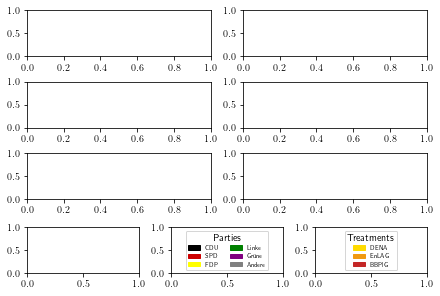

In [184]:
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(2, 1, height_ratios=[3., 1.])
axs0 = subfigs[0].subplots(3, 2)

axs1 = subfigs[1].subplots(1, 3)
axs1[1].clear()
axs1[1].legend(handles=party_handles, labels=party_labels, loc='lower center', title='Parties', ncol=2)
axs1[2].legend(handles=pl_handles, labels=pl_labels, loc='lower center', title='Treatments', ncol=1)
plt.show()